---
title: Bayesian Regression
layout: collection
permalink: /Machine-Learning/Bayesian-Regression
collection: Machine-Learning
entries_layout: grid
mathjax: true
toc: true
categories:
  - study
tags:
  - mathematics
  - statistics
  - machine-learning 
---

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
from scipy.stats import multivariate_normal
import seaborn as sns 
sns.set_style()
import matplotlib.pyplot as plt

from IPython.display import display, clear_output

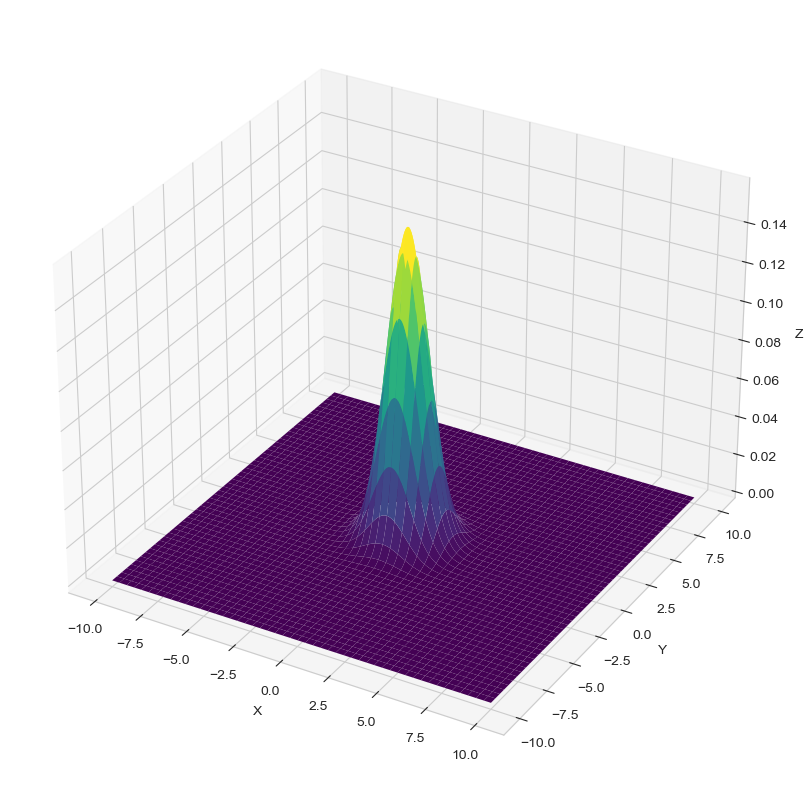

In [12]:
# define a grid for x and y values
x = np.linspace(-10, 10, 500)  # generate 500 points between -10 and 10 for x
y = np.linspace(-10, 10, 500)  # generate 500 points between -10 and 10 for y
X, Y = np.meshgrid(x, y)  # create a grid for (x,y) pairs

# create an empty array of the same shape as X to hold the (x, y) coordinates
pos = np.empty(X.shape + (2,))

# fill the pos array with the x and y coordinates
pos[:, :, 0] = X  
pos[:, :, 1] = Y  

# create a multivariate normal distribution using the defined parameters
rv = multivariate_normal(np.zeros(2,), np.eye(2))

# create a new figure for 3D plot
fig = plt.figure(figsize=(10, 20))

# add a 3D subplot to the figure
ax = fig.add_subplot(projection='3d')

# create a 3D surface plot of the multivariate normal distribution
ax.plot_surface(X, Y, rv.pdf(pos), cmap='viridis', linewidth=0)

# set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# display the 3D plot
plt.show();

In [13]:
def data_generator(f, x: list, y: list, n: int = 1) -> tuple[np.array, np.array]:
    xi = 4 * (np.random.random() - 0.5)
    yi = np.random.normal(loc=f(xi), scale=1)
    x.append(xi)
    y.append(yi)
    return np.array(x), np.array(y)

### Basis expansion

In [14]:
def basis_expansion(basis :tuple, x : np.array) -> np.array:
    array_expanded = np.zeros((len(basis), len(x)))
    for i, f in enumerate(basis):
        for j, point in enumerate(x):
            array_expanded[i, j] = f(point)
    return array_expanded.T
            

### Posterior distribution

In [15]:
def posterior_distribution(X: np.array, y: np.array, sigma: float, tau: float) -> tuple[np.array, np.array]:
    n, m = X.shape
    #print(X.shape, y.shape, X, y, X.T @ X)
    beta = np.linalg.inv(X.T @ X + (sigma / tau)**2 * np.eye(m)) @ X.T @ y
    covariance = np.linalg.inv((1 / sigma**2) * X.T @ X + (1 / tau**2) * np.eye(m))
    return beta, covariance

### Posterior predictive distribution 

In [16]:
def posterior_predictive_distribution(X: np.array, beta: np.array, sigma, covariance: np.array):
    
    pass

### BIC score

In [17]:
def bic_score(mean: float, var: float) -> float:
  n = len(x)
  for d in range(1, 20):
    break
      

### Implementation

In [19]:
x = []
y = []
f = lambda x : x**3 - x + 1
basis = (lambda x: x**0, lambda x: x**1, lambda x: x**2, lambda x: x**3)

plt.figure(figsize=(10, 6))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian linear regression')
x_points = np.linspace(-1.5, 1.5)
for i in range(20):  
    x_array, y_array = data_generator(f, x, y)
    
    X = basis_expansion(basis, x_array)
    beta, covariance = posterior_distribution(X, y_array, 1, 1)
    y_pred = basis_expansion(basis, x_points) @ beta.T
    
    plt.plot(x_points, y_pred, color='red', alpha=0.1)
    sns.scatterplot(x=x, y=y)
    #sns.lineplot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), color='red')
    
    plt.legend(['Random points', 'Original function'])
    plt.show()
    clear_output(wait=True)
    plt.pause(1)